In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Part 1 : Data Introduction

In [3]:
df_scores = pd.read_csv('Restaurant_Scores_LIVES_Standard.csv')
df_scores.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_scores.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'Neighborhoods (old)', 'Police Districts',
       'Supervisor Districts', 'Fire Prevention Districts', 'Zip Codes',
       'Analysis Neighborhoods'],
      dtype='object')

In [5]:
df_scores.shape

(53973, 23)

In [6]:
df_scores.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [7]:
#check for missing data
for x in df_scores.columns:
  print(x,df_scores[x].unique())

business_id [101192  97975  92982 ...   7111  68558  98279]
business_name ['Cochinita #2' 'BREADBELLY' 'Great Gold Restaurant' ... 'OAK FAIR MARKET'
 'Slow City' 'LITTLE GEM']
business_address ['2 Marina Blvd Fort Mason' '1408 Clement St' '3161 24th St.' ...
 '999 OAK St' 'Music Concourse in Golden Gate Park' '2184 UNION ST']
business_city ['San Francisco']
business_state ['CA']
business_postal_code [nan '94118' '94110' '94111' '94109' '94107' '94133' '94117' '94103'
 '94121' '94108' '94102' '94132' '94104' '94122' '94123' '94112' '94115'
 '94105' '94188' '94114' '94124' '94158' '94116' '94134' '94130' '94127'
 '94131' '94124-1917' 'Ca' '94101' '94117-3504' '95122' '64110' '94544'
 '94143' '94080' '95132' '95112' '94102-5917' '94105-2907' '94013' '94301'
 '94120' '94105-1420' '94123-3106' '95105' '94602' '00000' '941102019'
 '941033148' '94122-1909' '94129' '95117' '94518' 'CA' '941' '92672'
 '94014' '94901' '95133' '95109' '94621']
business_latitude [      nan 37.778634 37.781168 ... 

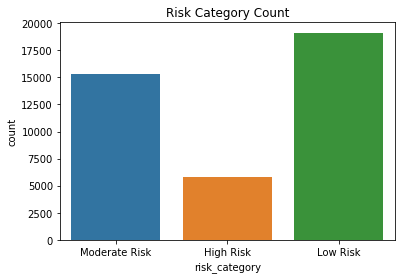

In [8]:
sns.countplot(df_scores['risk_category'])
plt.title('Risk Category Count')
plt.show()

# Part 2 : Basic Data Cleaning

# A : Narrowing down columns for Cleaning
After analyzing columns I concluded that the following features can be removed:
    1) business_name: restaurant can be easily identified by business id, so it was ignored.
    2) business_address: since the dataset has postal codes, latitude and longitude to identify business location.
    3) business_city: business city in dataset was San Francisco. 
    4) business_state: observed that business state in whole dataset is California.
    5) business_location: dropped this column because we already have latitude and longitude columns
    6) business_phone_number: This column is not important feature when predicting restaurant risk factor.

In [9]:
drop_list = ['business_name','business_address','business_city','business_state','business_location',
             'business_phone_number','Neighborhoods (old)','Police Districts',
             'Supervisor Districts','Fire Prevention Districts','Zip Codes','Analysis Neighborhoods','inspection_id']
df_scores = df_scores.drop(drop_list,axis=1)

In [10]:
df_scores.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,101192,NaN,NaN,NaN,06/06/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
1,97975,94118,NaN,NaN,07/25/2019 12:00:00 AM,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,92982,94110,NaN,NaN,09/12/2017 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
3,101389,94111,NaN,NaN,06/25/2019 12:00:00 AM,NaN,New Construction,NaN,NaN,NaN
4,85986,94109,NaN,NaN,10/11/2016 12:00:00 AM,NaN,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk


In [11]:
#Checking for the number of null values
df_scores.isnull().sum()

business_id                  0
business_postal_code      1186
business_latitude        26498
business_longitude       26498
inspection_date              0
inspection_score         14432
inspection_type              0
violation_id             13720
violation_description    13720
risk_category            13720
dtype: int64

In [12]:
#Number of unique values
df_scores.apply(lambda y: len(y.unique()))

business_id               6253
business_postal_code        63
business_latitude         2296
business_longitude        2324
inspection_date            813
inspection_score            48
inspection_type             15
violation_id             40211
violation_description       66
risk_category                4
dtype: int64

In [13]:
df_scores.isna().any().any()

True

# B:Dealing with data types

1) There are three main data types:
    Numeric
    Categorical
    Ordinal, e.g.low/medium/high

2) Models can only handle numeric features

3) Must convert categorical and ordinal features into numeric features:
    Create dummy features
    Transform a categorical feature into a set of dummy features, each representing a unique category
    

In [14]:
#Checking for unique categorical features
for col_name in df_scores.columns:
    if df_scores[col_name].dtypes == 'object':
        unique_category = len(df_scores[col_name].unique())
        print("Feature '{col_name}' has {unique_category} unique categories".format(
                col_name = col_name, unique_category = unique_category))

Feature 'business_postal_code' has 63 unique categories
Feature 'inspection_date' has 813 unique categories
Feature 'inspection_type' has 15 unique categories
Feature 'violation_id' has 40211 unique categories
Feature 'violation_description' has 66 unique categories
Feature 'risk_category' has 4 unique categories


In [15]:
#removing unwanted hypen and categorical value from business_postal_code column
df_scores['business_postal_code'].unique().tolist()

[nan,
 '94118',
 '94110',
 '94111',
 '94109',
 '94107',
 '94133',
 '94117',
 '94103',
 '94121',
 '94108',
 '94102',
 '94132',
 '94104',
 '94122',
 '94123',
 '94112',
 '94115',
 '94105',
 '94188',
 '94114',
 '94124',
 '94158',
 '94116',
 '94134',
 '94130',
 '94127',
 '94131',
 '94124-1917',
 'Ca',
 '94101',
 '94117-3504',
 '95122',
 '64110',
 '94544',
 '94143',
 '94080',
 '95132',
 '95112',
 '94102-5917',
 '94105-2907',
 '94013',
 '94301',
 '94120',
 '94105-1420',
 '94123-3106',
 '95105',
 '94602',
 '00000',
 '941102019',
 '941033148',
 '94122-1909',
 '94129',
 '95117',
 '94518',
 'CA',
 '941',
 '92672',
 '94014',
 '94901',
 '95133',
 '95109',
 '94621']

In [16]:
#replacing non postal code to null values
values = ['CA','Ca','941']
df_scores['business_postal_code'] = df_scores['business_postal_code'].replace(values, np.nan)

In [17]:
rows_with_dashes = df_scores['business_postal_code'].str.contains('-').fillna(False)
print("length :",len(df_scores[rows_with_dashes]))
df_scores[rows_with_dashes].head(3)

length : 21


,business_id,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
441,98376,94124-1917,NaN,NaN,09/04/2019 12:00:00 AM,92.0,Routine - Unscheduled,98376_20190904_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
868,100781,94117-3504,NaN,NaN,04/25/2019 12:00:00 AM,92.0,Routine - Unscheduled,100781_20190425_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
1113,98376,94124-1917,NaN,NaN,11/30/2018 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN


In [18]:
#removing the hypen in the postal code and selecting the long postal code's first 5 digits
df_scores['business_postal_code'] = df_scores['business_postal_code'].str[:5]

In [19]:
#correcting postal code starting from '6'
df_scores['business_postal_code'] = df_scores['business_postal_code'].replace('64110','94110')

In [20]:
print(df_scores['business_postal_code'].unique())

[nan '94118' '94110' '94111' '94109' '94107' '94133' '94117' '94103'
 '94121' '94108' '94102' '94132' '94104' '94122' '94123' '94112' '94115'
 '94105' '94188' '94114' '94124' '94158' '94116' '94134' '94130' '94127'
 '94131' '94101' '95122' '94544' '94143' '94080' '95132' '95112' '94013'
 '94301' '94120' '95105' '94602' '00000' '94129' '95117' '94518' '92672'
 '94014' '94901' '95133' '95109' '94621']


In [21]:
#changing the inspection date column to day, month and year
df_scores['inspection_date'] = df_scores['inspection_date'].str.rstrip(' 12:00:00 AM')
df_scores['inspection_year'] = pd.DatetimeIndex(df_scores['inspection_date']).year
df_scores['inspection_month'] = pd.DatetimeIndex(df_scores['inspection_date']).month
df_scores['inspection_day'] = pd.DatetimeIndex(df_scores['inspection_date']).day
df_scores = df_scores.drop('inspection_date', axis=1)

In [22]:
#extracting violation id from violation_id column as it contains business_id+date_unique_violation_id
df_scores['violation_id'] = df_scores.violation_id.str.split('_').str[2]

In [23]:
df_scores.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,inspection_type,violation_id,violation_description,risk_category,inspection_year,inspection_month,inspection_day
0,101192,NaN,NaN,NaN,NaN,New Ownership,NaN,NaN,NaN,2019,6,6
1,97975,94118,NaN,NaN,96.0,Routine - Unscheduled,103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,2019,7,25
2,92982,94110,NaN,NaN,NaN,New Ownership,NaN,NaN,NaN,2017,9,12
3,101389,94111,NaN,NaN,NaN,New Construction,NaN,NaN,NaN,2019,6,25
4,85986,94109,NaN,NaN,NaN,New Ownership,103114,High risk vermin infestation,High Risk,2016,10,11


In [24]:
df_scores.dtypes

business_id                int64
business_postal_code      object
business_latitude        float64
business_longitude       float64
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
inspection_year            int64
inspection_month           int64
inspection_day             int64
dtype: object

In [25]:
df_scores.describe()

,business_id,business_latitude,business_longitude,inspection_score,inspection_year,inspection_month,inspection_day
count,53973.000000,27475.000000,27475.000000,39541.000000,53973.000000,53973.000000,53973.000000
mean,55218.877883,37.750969,-122.360157,86.221669,2017.896319,6.313805,15.690345
std,36165.556449,0.882643,2.859985,8.489218,0.943346,3.375459,8.806278
min,19.000000,0.000000,-122.510896,45.000000,2016.000000,1.000000,1.000000
25%,7558.000000,37.756133,-122.437069,81.000000,2017.000000,3.000000,8.000000
50%,69186.000000,37.780133,-122.419107,87.000000,2018.000000,6.000000,16.000000
75%,86385.000000,37.788864,-122.407417,92.000000,2019.000000,9.000000,23.000000
max,102705.000000,37.824494,0.000000,100.000000,2019.000000,12.000000,31.000000


In [26]:
df_scores.shape

(53973, 12)

In [27]:
#rows with 0 min values in business_latitude and postal_code
df_scores = df_scores[df_scores.business_postal_code != 0]
df_scores = df_scores[df_scores.business_latitude != 0]

In [28]:
df_scores.shape

(53958, 12)

In [29]:
#Checking unique value of inspection_type column
df_scores.inspection_type.unique().tolist()

['New Ownership',
 'Routine - Unscheduled',
 'New Construction',
 'Structural Inspection',
 'Reinspection/Followup',
 'New Ownership - Followup',
 'Non-inspection site visit',
 'Complaint',
 'Complaint Reinspection/Followup',
 'Routine - Scheduled',
 'Foodborne Illness Investigation',
 'Multi-agency Investigation',
 'Special Event',
 'Administrative or Document Review',
 'Community Health Assessment']

In [30]:
#dropping rows where inspection_type is null
df_scores = df_scores.dropna(subset=['inspection_type'])

In [31]:
df_scores.shape

(53958, 12)

In [32]:
#Since inspection_type has many category so converting the categories into four general categories:
#'Routine', 'Complaint', 'New', 'Investigation'

df_scores_routine = dict.fromkeys(['Routine - Unscheduled', 'Reinspection/Followup', 'Routine - Scheduled'], 'Routine')
df_scores_complaint = dict.fromkeys(['Complaint', 'Complaint Reinspection/Followup'], 'Complaint')
df_scores_new = dict.fromkeys(['New Ownership', 'New Construction', 'New Ownership - Followup'], 'New')
df_scores_investigation = dict.fromkeys(['Structural Inspection', 'Non-inspection site visit', 'Foodborne Illness Investigation', 
                               'Special Event', 'Multi-agency Investigation', 'Administrative or Document Review', 
                               'Community Health Assessment'], 'Investigation')

In [33]:
df_scores = df_scores.replace(df_scores_routine)
df_scores = df_scores.replace(df_scores_complaint)
df_scores = df_scores.replace(df_scores_new)
df_scores = df_scores.replace(df_scores_investigation)

In [34]:
#changing the categorical value of inspection_type to numerical values(1,2,3,4)

df_scores['inspection_type'] = df_scores['inspection_type'].replace({'Routine':1, 'Complaint':2, 'New':3, 'Investigation':4})

In [35]:
df_scores.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,inspection_type,violation_id,violation_description,risk_category,inspection_year,inspection_month,inspection_day
0,101192,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2019,6,6
1,97975,94118,NaN,NaN,96.0,1,103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,2019,7,25
2,92982,94110,NaN,NaN,NaN,3,NaN,NaN,NaN,2017,9,12
3,101389,94111,NaN,NaN,NaN,3,NaN,NaN,NaN,2019,6,25
4,85986,94109,NaN,NaN,NaN,3,103114,High risk vermin infestation,High Risk,2016,10,11


In [36]:
#risk_category values counts
df_scores['risk_category'].value_counts()

Low Risk         19109
Moderate Risk    15316
High Risk         5825
Name: risk_category, dtype: int64

In [37]:
#converting risk_category categorical values to numeric values
df_scores['risk_category'] = df_scores['risk_category'].replace({'Low Risk':1, 'Moderate Risk':2, 'High Risk':3})

In [38]:
df_scores.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,inspection_type,violation_id,violation_description,risk_category,inspection_year,inspection_month,inspection_day
0,101192,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2019,6,6
1,97975,94118,NaN,NaN,96.0,1,103124,Inadequately cleaned or sanitized food contact...,2.0,2019,7,25
2,92982,94110,NaN,NaN,NaN,3,NaN,NaN,NaN,2017,9,12
3,101389,94111,NaN,NaN,NaN,3,NaN,NaN,NaN,2019,6,25
4,85986,94109,NaN,NaN,NaN,3,103114,High risk vermin infestation,3.0,2016,10,11


In [39]:
#unique values of description
df_scores.violation_description.unique().tolist()

[nan,
 'Inadequately cleaned or sanitized food contact surfaces',
 'High risk vermin infestation',
 'Moderate risk food holding temperature',
 'Improper storage use or identification of toxic substances',
 'Improper or defective plumbing',
 'No hot water or running water',
 'Inadequate and inaccessible handwashing facilities',
 'Low risk vermin infestation',
 'Insufficient hot water or running water',
 'Foods not protected from contamination',
 'Improper food storage',
 'Unapproved or unmaintained equipment or utensils',
 'Wiping cloths not clean or properly stored or inadequate sanitizer',
 'Food safety certificate or food handler card not available',
 'Improper thawing methods',
 'Improper cooling methods',
 'Unclean or degraded floors walls or ceilings',
 'Inadequate food safety knowledge or lack of certified food safety manager',
 'Other low risk violation',
 'Inadequate procedures or records for time as a public health control',
 'Unclean nonfood contact surfaces',
 'High risk foo

In [40]:
#converting violation description to 4 categories 'Hygiene','Legal','Noncompliance', 'Lack_Infrastructure'
violation_desc_hygiene = dict.fromkeys(['Unclean or degraded floors walls or ceilings', 
'Wiping cloths not clean or properly stored or inadequate sanitizer', 'Moderate risk vermin infestation', 
'Unclean nonfood contact surfaces', 'Foods not protected from contamination', 'Unclean hands or improper use of gloves', 
'High risk vermin infestation', 'Inadequately cleaned or sanitized food contact surfaces', 'Low risk vermin infestation',
'Unclean or unsanitary food contact surfaces', 'Employee eating or smoking', 'Contaminated or adulterated food', 
'Unsanitary employee garments hair or nails', 'Other low risk violation', 'Unclean unmaintained or improperly constructed toilet facilities', 
'Other moderate risk violation', 'Sewage or wastewater contamination', 'Food in poor condition', 'Other high risk violation', 
'Reservice of previously served foods', 'Discharge from employee nose mouth or eye', 
'Improperly washed fruits and vegetables'], 'Hygiene')
violation_desc_lack_infra = dict.fromkeys(['Inadequate and inaccessible handwashing facilities', 
'Inadequate or unsanitary refuse containers or area or no garbage service', 'No thermometers or uncalibrated thermometers', 
'Improper or defective plumbing', 'No hot water or running water',  'No restroom facility within 200 feet of mobile food facility',
'Inadequate ventilation or lighting', 'Inadequate warewashing facilities or equipment', 
'Inadequate sewage or wastewater disposal', 'Insufficient hot water or running water'],'Lack_Infrastructure')
violation_desc_legal = dict.fromkeys(['Food safety certificate or food handler card not available', 
'Unapproved or unmaintained equipment or utensils', 'Permit license or inspection report not posted', 
'No plan review or Building Permit', 'Unapproved  living quarters in food facility', 'Unpermitted food facility', 
'Unapproved food source', 'Mobile food facility stored in unapproved location',
'Mobile food facility with unapproved operating conditions', 
'Mobile food facility not operating with an approved commissary'],'Legal')
violation_desc_noncompliance = dict.fromkeys(['High risk food holding temperature', 
'Inadequate food safety knowledge or lack of certified food safety manager', 
'Improper storage of equipment utensils or linens', 'Improper food storage', 'Improper thawing methods', 
'Moderate risk food holding temperature', 'Improper cooling methods', 
'Improper storage use or identification of toxic substances', 'Improper food labeling or menu misrepresentation',
'Improperly displayed mobile food permit or signage', 'Non service animal', 
'Noncompliance with shell fish tags or display', 'Noncompliance with HAACP plan or variance', 
'Inadequate HACCP plan record keeping', 'Inadequate dressing rooms or improper storage of personal items', 
'Improper reheating of food', 'Inadequate procedures or records for time as a public health control', 
'Worker safety hazards', 'No person in charge of food facility', 'Improper cooking time or temperatures', 
'Unauthorized or unsafe use of time as a public health control measure', 
'Consumer advisory not provided for raw or undercooked foods', 'Noncompliance with Gulf Coast oyster regulation', 
'Noncompliance with Cottage Food Operation'],'Noncompliance')

In [41]:
df_scores = df_scores.replace(violation_desc_hygiene)
df_scores = df_scores.replace(violation_desc_lack_infra)
df_scores = df_scores.replace(violation_desc_legal)
df_scores = df_scores.replace(violation_desc_noncompliance)

In [42]:
df_scores.violation_description.unique().tolist()

[nan, 'Hygiene', 'Noncompliance', 'Lack_Infrastructure', 'Legal']

In [43]:
#Assigning numerical value to violation description categorical values
df_scores['violation_description'] = df_scores['violation_description'].replace({'Hygiene':1, 'Legal':2, 
                                                                            'Noncompliance':3, 'Lack_Infrastructure':4})

In [44]:
df_scores = df_scores.dropna(subset=['business_postal_code','business_latitude','inspection_score','violation_description'])

In [45]:
df_scores.shape

(20317, 12)

In [46]:
#removing inspection_type column as it has left with only one unique value after removing null rows
df_scores = df_scores.drop('inspection_type', axis=1)

In [47]:
#checking for non null columns
df_scores.isnull().sum()

business_id              0
business_postal_code     0
business_latitude        0
business_longitude       0
inspection_score         0
violation_id             0
violation_description    0
risk_category            0
inspection_year          0
inspection_month         0
inspection_day           0
dtype: int64

In [48]:
df_scores.dtypes

business_id                int64
business_postal_code      object
business_latitude        float64
business_longitude       float64
inspection_score         float64
violation_id              object
violation_description    float64
risk_category            float64
inspection_year            int64
inspection_month           int64
inspection_day             int64
dtype: object

In [49]:
#changing data type of object variable to float
#business_postal_code
df_scores.business_postal_code = df_scores.business_postal_code.astype('float64')
#violation_id
df_scores.violation_id = df_scores.violation_id.astype('float64')

In [50]:
df_scores.dtypes

business_id                int64
business_postal_code     float64
business_latitude        float64
business_longitude       float64
inspection_score         float64
violation_id             float64
violation_description    float64
risk_category            float64
inspection_year            int64
inspection_month           int64
inspection_day             int64
dtype: object

In [51]:
#checking for unique columns values
df_scores.apply(lambda x : len(x.unique()))

business_id              2574
business_postal_code       32
business_latitude        2177
business_longitude       2200
inspection_score           45
violation_id               62
violation_description       4
risk_category               3
inspection_year             4
inspection_month           12
inspection_day             31
dtype: int64

In [52]:
#dataframe info
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20317 entries, 11 to 53888
Data columns (total 11 columns):
business_id              20317 non-null int64
business_postal_code     20317 non-null float64
business_latitude        20317 non-null float64
business_longitude       20317 non-null float64
inspection_score         20317 non-null float64
violation_id             20317 non-null float64
violation_description    20317 non-null float64
risk_category            20317 non-null float64
inspection_year          20317 non-null int64
inspection_month         20317 non-null int64
inspection_day           20317 non-null int64
dtypes: float64(7), int64(4)
memory usage: 1.9 MB


In [53]:
df_scores.describe()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_description,risk_category,inspection_year,inspection_month,inspection_day
count,20317.000000,20317.000000,20317.000000,20317.000000,20317.000000,20317.000000,20317.000000,20317.000000,20317.000000,20317.000000,20317.000000
mean,26433.862381,94113.525373,37.771820,-122.426930,85.349166,103134.019983,2.061033,1.654427,2017.805582,6.379731,15.429591
std,27061.935802,30.933460,0.023479,0.027786,8.106306,16.735836,1.128667,0.710743,0.955962,3.446618,8.805685
min,19.000000,92672.000000,37.681741,-122.510896,46.000000,103102.000000,1.000000,1.000000,2016.000000,1.000000,1.000000
25%,2843.000000,94108.000000,37.755824,-122.437247,81.000000,103120.000000,1.000000,1.000000,2017.000000,3.000000,8.000000
50%,8750.000000,94111.000000,37.780523,-122.418983,87.000000,103133.000000,2.000000,2.000000,2018.000000,6.000000,15.000000
75%,60473.000000,94121.000000,37.789064,-122.407217,92.000000,103149.000000,3.000000,2.000000,2019.000000,9.000000,23.000000
max,71915.000000,95105.000000,37.824494,-122.371798,100.000000,103177.000000,4.000000,3.000000,2019.000000,12.000000,31.000000


In [54]:
df_scores.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_description,risk_category,inspection_year,inspection_month,inspection_day
11,4794,94107.0,37.778634,-122.393089,71.0,103138.0,3.0,1.0,2018,10,30
16,66517,94102.0,37.781168,-122.419494,84.0,103120.0,3.0,2.0,2019,5,24
64,38231,94133.0,37.808240,-122.410189,92.0,103119.0,4.0,2.0,2019,8,16
73,37171,94103.0,37.781664,-122.404778,92.0,103120.0,3.0,2.0,2019,9,9
92,226,94111.0,37.799594,-122.400586,74.0,103133.0,1.0,2.0,2019,9,5


# Predicting variable and independent variable

In [55]:
X = df_scores.drop('risk_category', 1)
Y = df_scores['risk_category']

In [56]:
X.shape

(20317, 10)

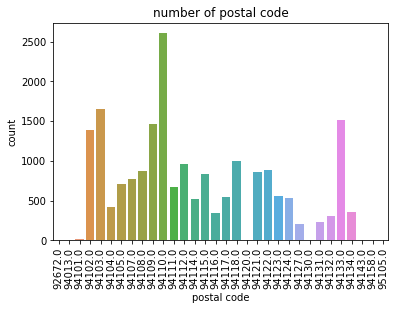

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [57]:
#Number of business postal code
g = sns.countplot(X['business_postal_code'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('number of postal code')
plt.xlabel('postal code')
plt.ylabel('count')
plt.show()
sns.despine

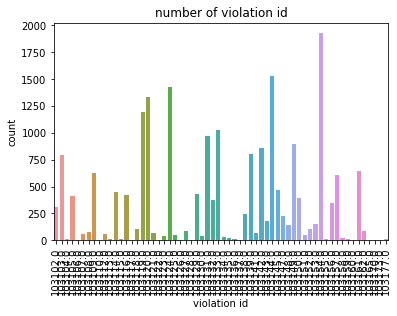

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [58]:
#Number of violation id
g = sns.countplot(X['violation_id'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('number of violation id')
plt.xlabel('violation id')
plt.ylabel('count')
plt.show()
sns.despine

<Figure size 360x360 with 0 Axes>

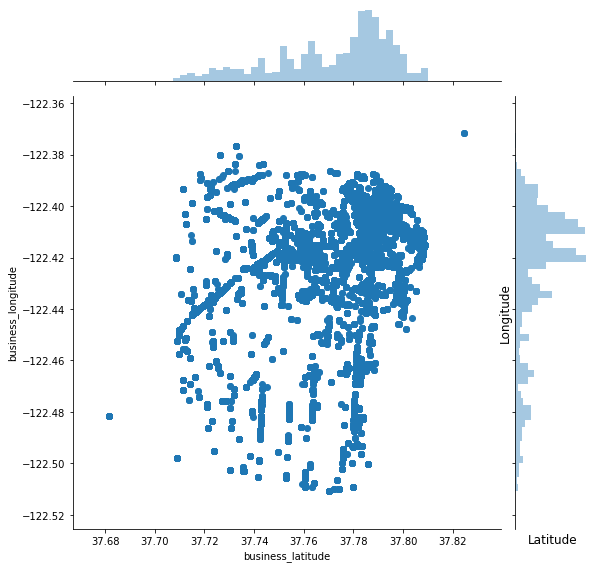

In [59]:
#Plotting Latitude and Longitude 
plt.figure(figsize=(5,5))
sns.jointplot(x=X.business_latitude, y=X.business_longitude, size=8)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.show()

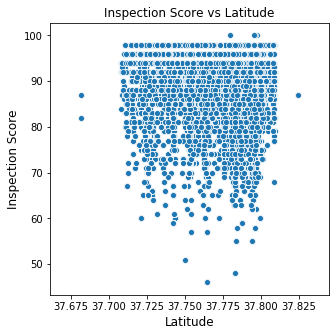

In [60]:
#Scatterplot of latitude vs inspection_score
plt.figure(figsize=(5,5))
sns.scatterplot(x = X['business_latitude'], y = X['inspection_score'])
plt.title('Inspection Score vs Latitude')
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Inspection Score", fontsize=12)
plt.show()

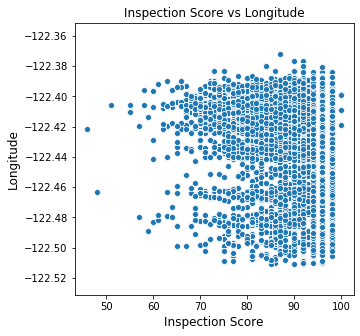

In [61]:
#Scatterplot of longitude vs inspection_score
plt.figure(figsize=(5,5))
sns.scatterplot(x = X['inspection_score'], y = X['business_longitude'])
plt.title('Inspection Score vs Longitude')
plt.ylabel("Longitude", fontsize=12)
plt.xlabel("Inspection Score", fontsize=12)
plt.show()

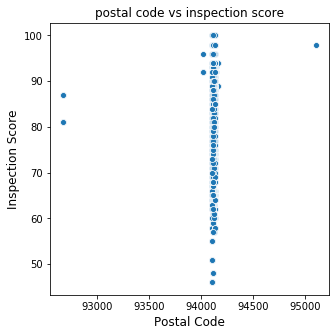

In [62]:
#postal code vs inspection score
plt.figure(figsize=(5,5))
sns.scatterplot(x = X['business_postal_code'], y = X['inspection_score'])
plt.title('postal code vs inspection score')
plt.xlabel("Postal Code", fontsize=12)
plt.ylabel("Inspection Score", fontsize=12)
plt.show()

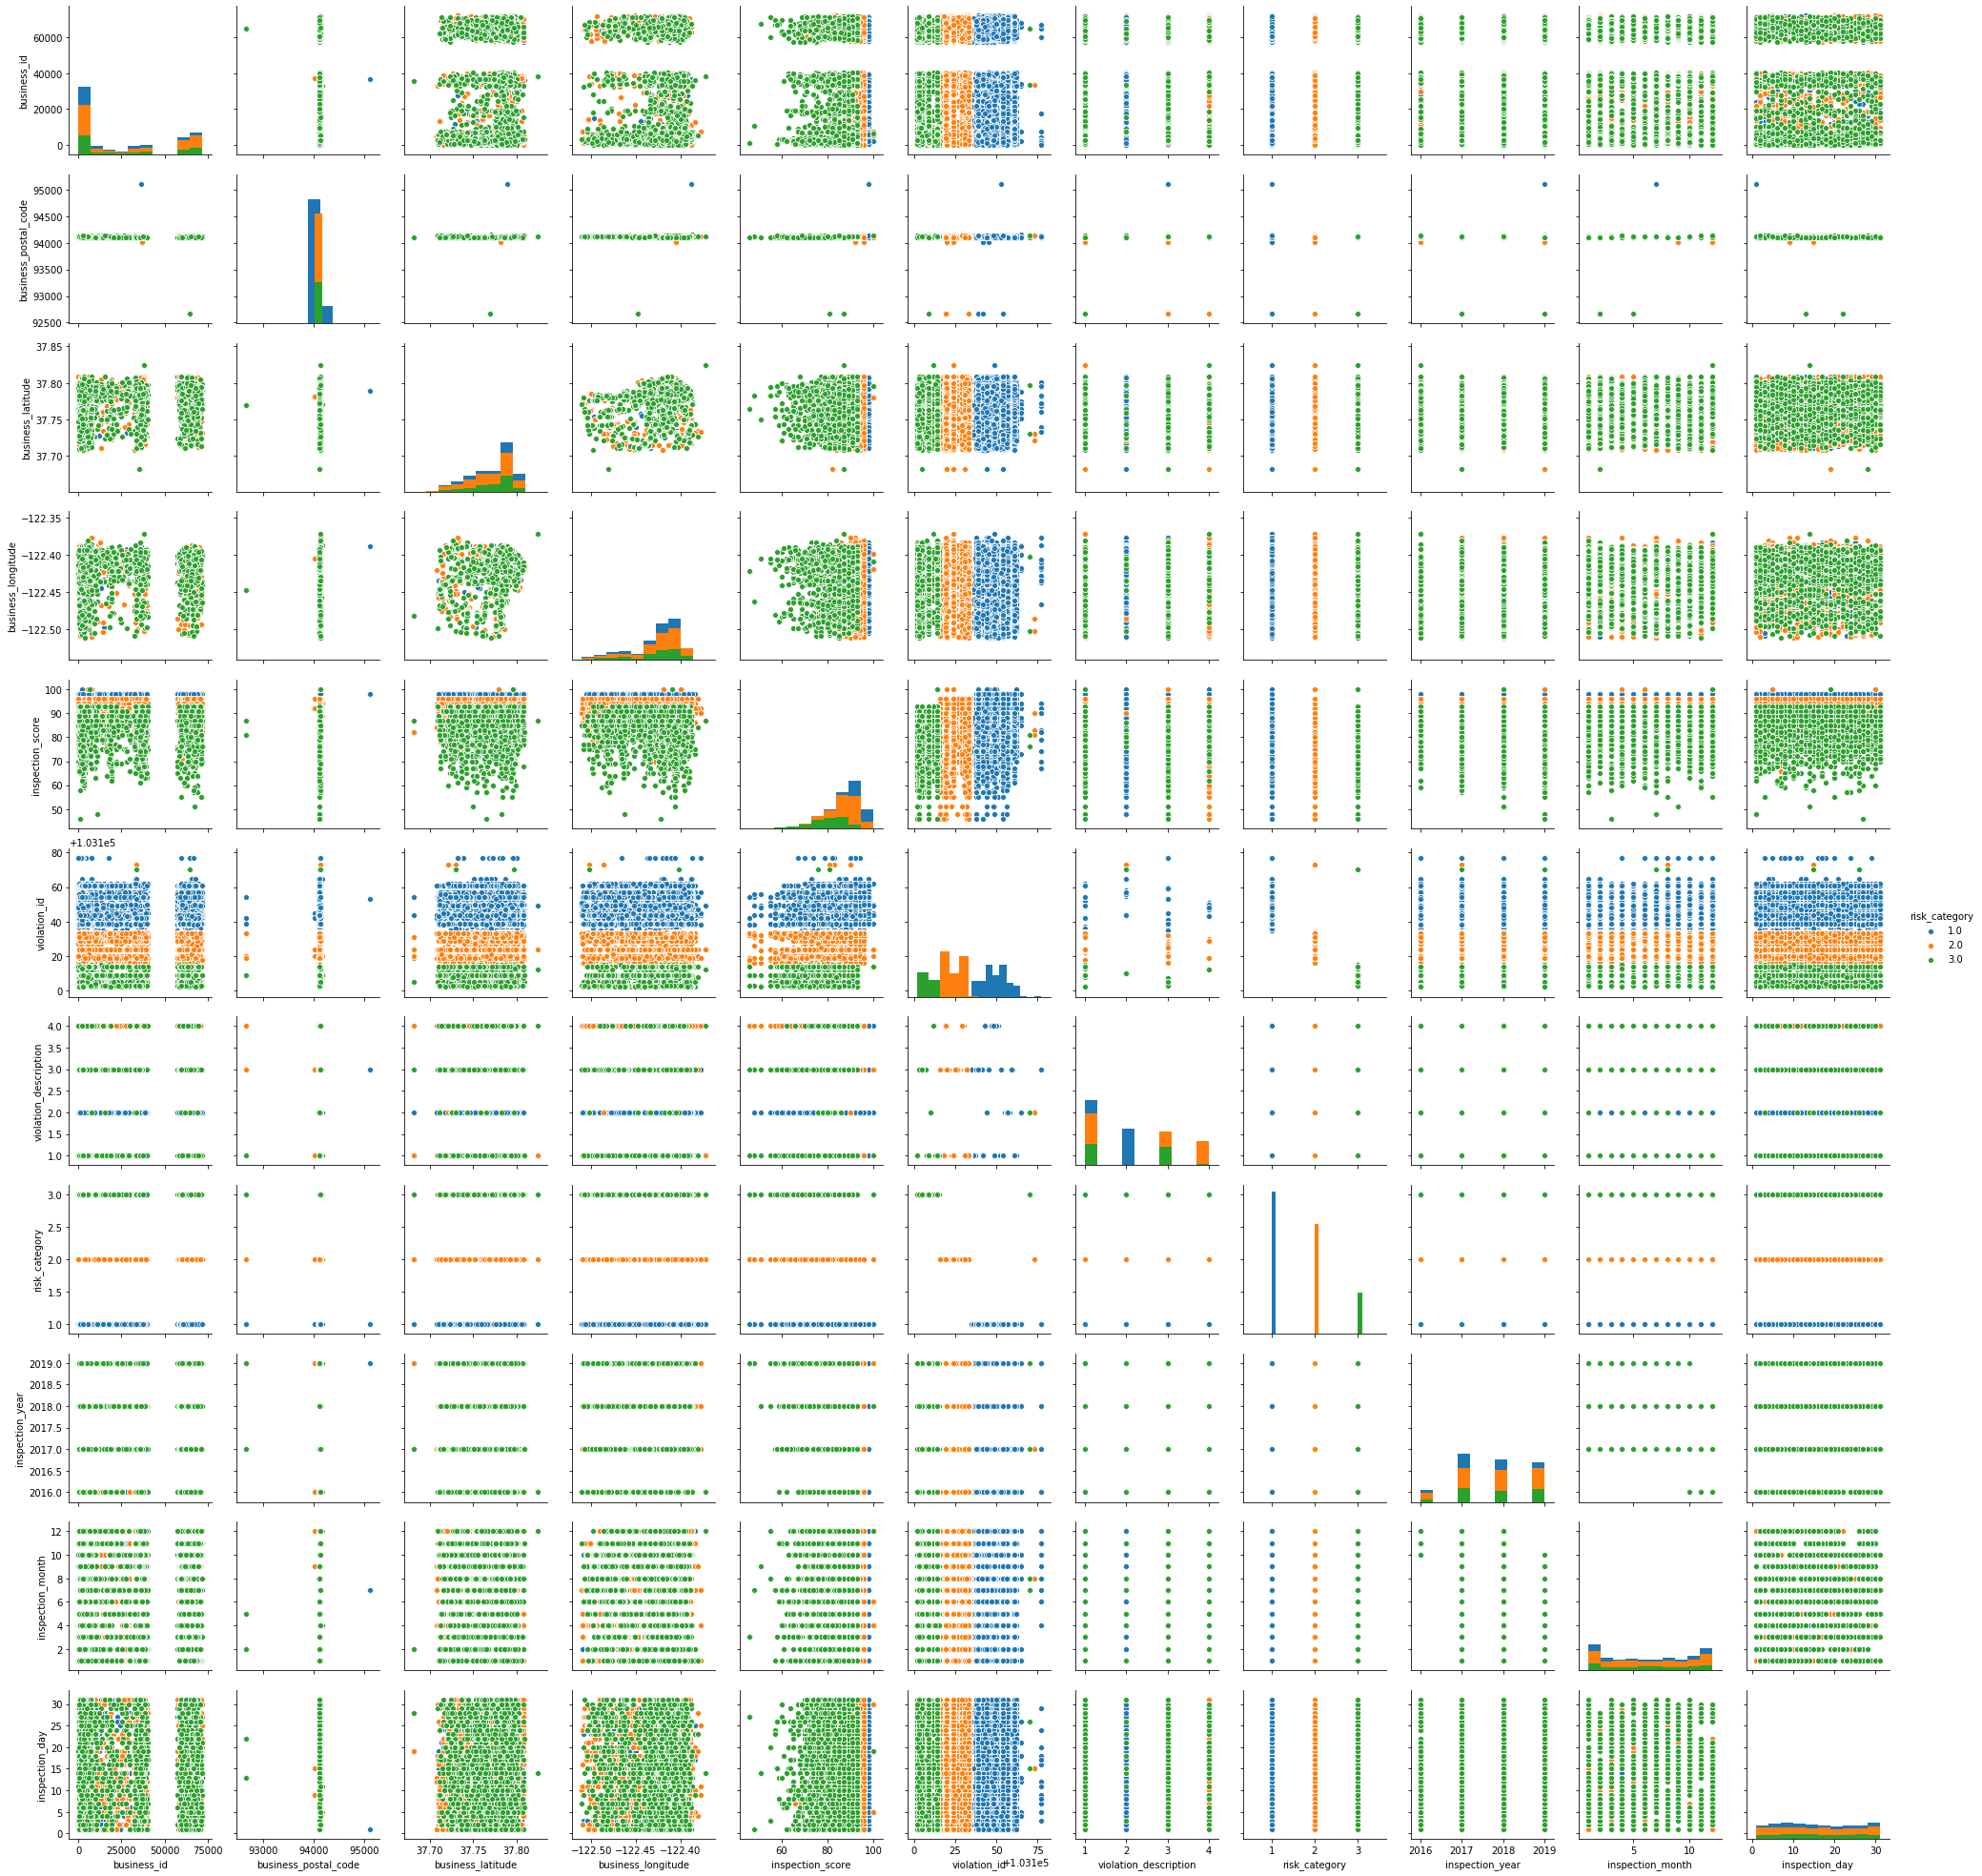

In [63]:
sns.pairplot(df_scores, hue="risk_category", diag_kind='hist') 

# FEATURE SELECTION
Reducing the number of input variables before developing a model

In [64]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concate two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Feature','Score'] #naming dataframe columns

In [65]:
print(featureScores.nlargest(10,'Score'))
plt.show()

                 Feature         Score
5           violation_id  65644.427074
4       inspection_score    818.335366
6  violation_description    216.093012
7        inspection_year     11.612261
0            business_id      8.328663
1   business_postal_code      4.977025
2      business_latitude      2.334791
3     business_longitude      2.103753
8       inspection_month      1.019293
9         inspection_day      0.684566


[0.0084005  0.00725316 0.00930259 0.00924808 0.02810375 0.84448581
 0.07410395 0.0043342  0.00697075 0.0077972 ]


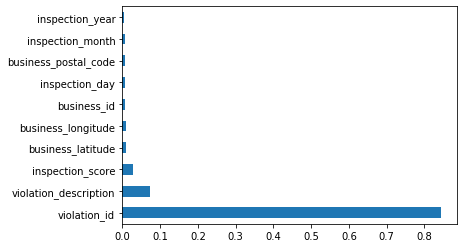

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
featmodel = ExtraTreesClassifier()
featmodel.fit(X,Y)
print(featmodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(featmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [67]:
#X = X.drop(['inspection_day','inspection_month','business_longitude'], axis=1)

In [68]:
X.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_description,inspection_year,inspection_month,inspection_day
11,4794,94107.0,37.778634,-122.393089,71.0,103138.0,3.0,2018,10,30
16,66517,94102.0,37.781168,-122.419494,84.0,103120.0,3.0,2019,5,24
64,38231,94133.0,37.808240,-122.410189,92.0,103119.0,4.0,2019,8,16
73,37171,94103.0,37.781664,-122.404778,92.0,103120.0,3.0,2019,9,9
92,226,94111.0,37.799594,-122.400586,74.0,103133.0,1.0,2019,9,5


In [69]:
X.to_csv("Restaurant_Scores_New_X.csv", index=False)
Y.to_csv("Restaurant_Scores_New_Y.csv", index=False)

# Train and Test split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [71]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16253, 10)
(16253,)
(4064, 10)
(4064,)


In [72]:
X_train.to_csv("X_train_modified.csv", index=False)
Y_train.to_csv("Y_train_modified.csv", index=False)
X_test.to_csv("X_test_modified.csv", index=False)
Y_test.to_csv("Y_test_modified.csv", index=False)

# Loading refined data into dataframe directly from the saved csv file to continue execution

In [73]:
#X_train = pd.read_csv("X_train_modified.csv")
#Y_train = pd.read_csv("Y_train_modified.csv")
#X_test = pd.read_csv("X_test_modified.csv")
#Y_test = pd.read_csv("Y_test_modified.csv")

# Feature Scaling

In [74]:
print(Y_test)

46424    3.0
19967    1.0
42981    1.0
44746    2.0
34846    2.0
        ... 
49535    1.0
42270    1.0
16544    3.0
45324    1.0
31070    1.0
Name: risk_category, Length: 4064, dtype: float64


In [75]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X_train_scaled = sc1.fit_transform(X_train)
#Y_train_scaled = sc2.fit_transform(Y_train.values.reshape(-1,1))
X_test_scaled = sc1.transform(X_test)
#Y_test_scaled = sc2.transform(Y_test.values.reshape(-1,1))

In [76]:
print(X_test)

       business_id  business_postal_code  business_latitude  \
46424        71456               94102.0          37.786672   
19967        69208               94105.0          37.794138   
42981         2610               94110.0          37.752284   
44746        17947               94121.0          37.780278   
34846        67063               94102.0          37.789118   
...            ...                   ...                ...   
49535        62056               94110.0          37.755555   
42270         7645               94110.0          37.754513   
16544        63940               94110.0          37.752813   
45324        13427               94132.0          37.711185   
31070        69828               94133.0          37.797129   

       business_longitude  inspection_score  violation_id  \
46424         -122.408005              89.0      103109.0   
19967         -122.394404              87.0      103161.0   
42981         -122.418928              92.0      103144.0   

# Common Methods for all Models

In [77]:
#Accuracy, F1 Score, Precision Score, Recall Score

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def displayMetrics(model, y_true, y_pred):
  
  #Accuracy Score
  print('Accuracy: ', accuracy_score(y_true, y_pred))
  
  #Precision Score
  print('Precision Score: ', precision_score(y_true, y_pred, average=None)) 
  
  #Recall Score
  print('Recall: ', recall_score(y_true, y_pred, average=None))
  
  #F1 Score
  print('F1 Score: ', f1_score(y_true, y_pred, average=None))

In [79]:
#Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix
def plotConfusionMatrix(y_true, y_pred):
  print(pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted']))


In [81]:
#Display Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
def displayConfusionMatrix(model, X_test, Y_test):
    plot_confusion_matrix(model,X_test,Y_test,values_format='d', 
                              display_labels=["Low Risk","Moderate Risk","High Risk"])

# Models

# 1: Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train_scaled,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [83]:
print(classifier_RF.predict(sc1.transform([[71456,94102.0,37.786672,-122.408005,89.0,103109.0,1.0,2019,5,3]])))

[3.]


In [84]:
#Predicting the test result of Random Forest
Y_pred_RF = classifier_RF.predict(X_test_scaled)
#Y_pred_RF.reshape(len(Y_pred_RF),1)
print(np.concatenate([Y_test.values.reshape(-1,1), Y_pred_RF.reshape(len(Y_pred_RF),1)], 1))

[[3. 3.]
 [1. 1.]
 [1. 1.]
 ...
 [3. 3.]
 [1. 1.]
 [1. 1.]]


In [85]:
displayMetrics(classifier_RF,Y_test,Y_pred_RF)

Accuracy:  0.999753937007874
Precision Score:  [0.99948106 1.         1.        ]
Recall:  [1.         1.         0.99821429]
F1 Score:  [0.99974046 1.         0.99910634]


In [86]:
print('\n Confusion matrix \n')
plotConfusionMatrix(Y_test, Y_pred_RF)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        1926     0    0
2.0           0  1578    0
3.0           1     0  559



 Confusion matrix 



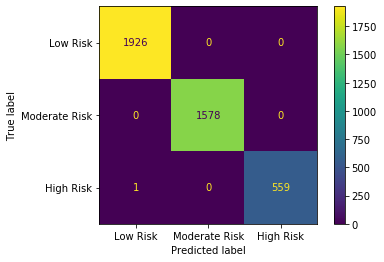

In [87]:
print('\n Confusion matrix \n')
displayConfusionMatrix(classifier_RF, X_test_scaled, Y_test)

# Accuracy is 99.9%

# 2: Support Vector Machine Model

In [88]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)  #SVM with linear kernel
classifier_svc.fit(X_train_scaled, Y_train)

SVC(kernel='linear', random_state=0)

In [89]:
Y_pred_svc = classifier_svc.predict(X_test_scaled)
displayMetrics(classifier_svc, Y_test, Y_pred_svc)

Accuracy:  0.9985236220472441
Precision Score:  [0.99947971 0.99684144 1.        ]
Recall:  [0.99740395 1.         0.99821429]
F1 Score:  [0.99844075 0.99841822 0.99910634]


In [90]:
print('\n Confusion matrix \n')
plotConfusionMatrix(Y_test, Y_pred_svc)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        1921     5    0
2.0           0  1578    0
3.0           1     0  559



 Confusion matrix 



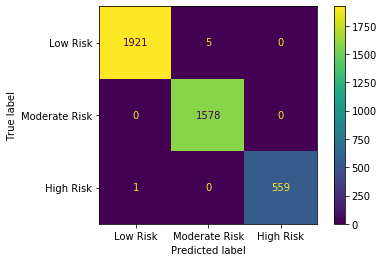

In [91]:
print('\n Confusion matrix \n')
displayConfusionMatrix(classifier_svc, X_test_scaled, Y_test)

# Accuracy is 99.8%

# 3: Kernel SVM

In [92]:
from sklearn.svm import SVC
classifier_kernel = SVC(kernel = 'rbf', random_state = 0)   #RBF - non-linear SVM
classifier_kernel.fit(X_train_scaled, Y_train)

SVC(random_state=0)

In [93]:
Y_pred_kernel = classifier_kernel.predict(X_test_scaled)
displayMetrics(classifier_kernel, Y_test, Y_pred_kernel)

Accuracy:  0.9960629921259843
Precision Score:  [0.99895996 0.99682136 0.98415493]
Recall:  [0.99740395 0.99366286 0.99821429]
F1 Score:  [0.99818135 0.99523961 0.99113475]


In [94]:
print('\n Confusion matrix \n')
plotConfusionMatrix(Y_test, Y_pred_kernel)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        1921     5    0
2.0           1  1568    9
3.0           1     0  559



 Confusion matrix 



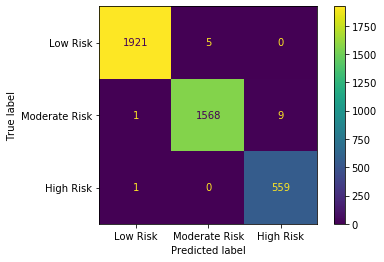

In [95]:
print('\n Confusion matrix \n')
displayConfusionMatrix(classifier_kernel, X_test_scaled, Y_test)

# Accuracy is 99.6%

# 4: Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
classifier_LG = LogisticRegression(random_state = 0)  
classifier_LG.fit(X_train_scaled, Y_train)

LogisticRegression(random_state=0)

In [97]:
Y_pred_LG = classifier_LG.predict(X_test_scaled)
displayMetrics(classifier_LG, Y_test, Y_pred_LG)

Accuracy:  0.9980314960629921
Precision Score:  [0.99947998 0.9955836  1.        ]
Recall:  [0.99792316 1.         0.99285714]
F1 Score:  [0.99870096 0.99778691 0.99641577]


In [98]:
print('\n Confusion matrix \n')
plotConfusionMatrix(Y_test, Y_pred_LG)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        1922     4    0
2.0           0  1578    0
3.0           1     3  556



 Confusion matrix 



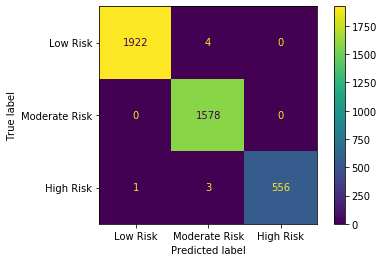

In [99]:
print('\n Confusion matrix \n')
displayConfusionMatrix(classifier_LG, X_test_scaled, Y_test)

# Accuracy is 99.8%

# 5: K-Nearest Neighbors Model

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [101]:
Y_pred_KNN = classifier_KNN.predict(X_test_scaled)
displayMetrics(classifier_KNN, Y_test, Y_pred_KNN)

Accuracy:  0.9436515748031497
Precision Score:  [0.96397324 0.9130967  0.9650924 ]
Recall:  [0.97248183 0.94550063 0.83928571]
F1 Score:  [0.96820884 0.92901619 0.89780325]


In [102]:
print('\n Confusion matrix \n')
plotConfusionMatrix(Y_test, Y_pred_KNN)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        1873    53    0
2.0          69  1492   17
3.0           1    89  470



 Confusion matrix 



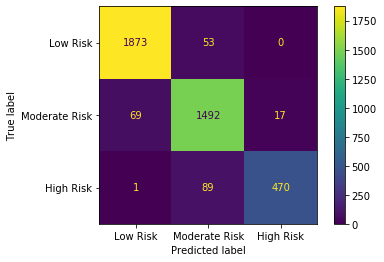

In [103]:
print('\n Confusion matrix \n')
displayConfusionMatrix(classifier_KNN, X_test_scaled, Y_test)

# Accuracy 94.3%

# 6: Neural Network

In [104]:
from sklearn.neural_network import MLPClassifier
classifier_mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))
classifier_mlp.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [105]:
Y_pred_mlp = classifier_mlp.predict(X_test_scaled)
displayMetrics(classifier_mlp, Y_test, Y_pred_mlp)

Accuracy:  0.999753937007874
Precision Score:  [0.99948106 1.         1.        ]
Recall:  [1.         1.         0.99821429]
F1 Score:  [0.99974046 1.         0.99910634]


In [106]:
print('\n Confusion matrix \n')
plotConfusionMatrix(Y_test, Y_pred_mlp)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        1926     0    0
2.0           0  1578    0
3.0           1     0  559



 Confusion matrix 



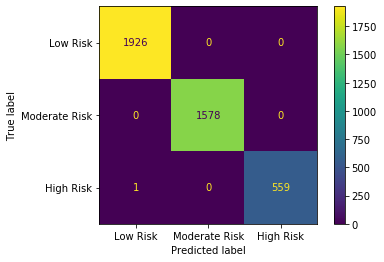

In [107]:
print('\n Confusion matrix \n')
displayConfusionMatrix(classifier_mlp, X_test_scaled, Y_test)

# Accuracy 99.9%

# KNN model has the least accuracy
Random Forest and Multi-Layer Perceptron Neural Network has the best accuracy